<a href="https://colab.research.google.com/github/Kretski/GravOptAdaptiveE/blob/main/GravOpt_Adaptive_E_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# DEMO LIMITATION NOTICE
print("⚠️  DEMO VERSION - COMMERCIAL USE REQUIRED")
print("📈 Current limits: 20 nodes, 200 iterations")
print("💼 Remove limits: https://buy.stripe.com/14A28r4rEfYEaUgfwh4c800")
print("🔒 Commercial license includes full features & support")
# -*- coding: utf-8 -*-
"""GravOptAdaptiveE - Quantum-Inspired Optimization Demo
Auto-executing notebook for seamless user experience.
"""

# Auto-execute on open
from IPython.display import Javascript
Javascript("""
setTimeout(function() {
    const runAll = document.querySelector('[aria-label="Run all"]');
    if (runAll) {
        runAll.click();
        console.log('🚀 GravOpt: Auto-running demonstration...');
    }
}, 1500);
""")

print("🎯 GravOpt Adaptive-E Demo - Auto-starting...")
print("⏳ Optimization will begin in 2 seconds...")

# Cell 1 – Install & Setup
!pip install -q torch>=2.0 networkx matplotlib numba --quiet
print("✅ All dependencies installed · GravOpt running in DEMO mode")

⚠️  DEMO VERSION - COMMERCIAL USE REQUIRED
📈 Current limits: 20 nodes, 200 iterations
💼 Remove limits: https://buy.stripe.com/14A28r4rEfYEaUgfwh4c800
🔒 Commercial license includes full features & support
🎯 GravOpt Adaptive-E Demo - Auto-starting...
⏳ Optimization will begin in 2 seconds...
✅ All dependencies installed · GravOpt running in DEMO mode


In [ ]:
# [CELL 2] - GravOpt Adaptive-E Implementation
import numpy as np
import torch
import networkx as nx
import matplotlib.pyplot as plt
import random

class QuantumGravOptAdaptiveE:
    def __init__(self, param_shape, lr=0.05, M_max=0.25, h_decay=0.95, freeze_threshold=0.01):
        self.param_shape = param_shape
        self.num_params = np.prod(param_shape)
        self.param_dict = {}

        for i in range(self.num_params):
            param_id = f"param_{i}"
            self.param_dict[param_id] = {
                'h': 1.0, 'M': 0.0, 'grad_history': []
            }

        self.lr = lr
        self.M_max = M_max
        self.h_decay = h_decay
        self.freeze_threshold = freeze_threshold
        self.step_count = 0
        self.energy_history = []

    def quantum_step(self, gradients, current_energy):
        self.energy_history.append(current_energy)
        energy_trend = self._calculate_energy_trend()

        for param_id, grad in gradients.items():
            if param_id not in self.param_dict:
                continue

            p_info = self.param_dict[param_id]
            corrected_grad = -grad

            grad_stability = self._calculate_grad_stability(p_info, corrected_grad)
            energy_stability = np.exp(-abs(energy_trend)) if len(self.energy_history) > 5 else 1.0

            h_update = self.h_decay * grad_stability * energy_stability
            p_info['h'] = max(p_info['h'] * h_update, 0.001)

            energy_factor = 1.0 / (1.0 + abs(energy_trend))
            quantum_M = p_info['M'] + energy_factor * corrected_grad
            p_info['M'] = np.clip(quantum_M, -self.M_max, self.M_max)

            p_info['grad_history'].append(float(corrected_grad))
            if len(p_info['grad_history']) > 10:
                p_info['grad_history'].pop(0)

        self.step_count += 1
        return self._get_updates()

    def _get_updates(self):
        updates = np.zeros(self.num_params)
        for i in range(self.num_params):
            param_id = f"param_{i}"
            p_info = self.param_dict[param_id]
            if p_info['h'] > self.freeze_threshold:
                updates[i] = self.lr * p_info['h'] * p_info['M']
        return updates

    def _calculate_energy_trend(self):
        if len(self.energy_history) < 5:
            return 0.0
        recent = self.energy_history[-5:]
        return (recent[-1] - recent[0]) / 4.0

    def _calculate_grad_stability(self, p_info, current_grad):
        if len(p_info['grad_history']) < 3:
            return 1.0
        hist = p_info['grad_history']
        current = float(current_grad)
        avg_magnitude = np.mean([abs(g) for g in hist])
        if avg_magnitude < 1e-8:
            return 1.0
        variance = np.var(hist + [current])
        return 1.0 / (1.0 + variance)

print("✅ GravOpt Adaptive-E loaded successfully!")

✅ GravOpt Adaptive-E loaded successfully!


In [ ]:
# [CELL 3] - MAX-CUT Demo
def create_maxcut_graph(n_nodes=20):
    """Create a random graph for MAX-CUT"""
    G = nx.erdos_renyi_graph(n_nodes, 0.4)  # ↑ Плътност на графа
    for u, v in G.edges():
        G[u][v]['weight'] = random.uniform(0.8, 2.0)  # ↑ По-високи тегла
    return G

def maxcut_energy(partition, graph):
    """Calculate MAX-CUT energy"""
    cut_weight = 0
    for u, v in graph.edges():
        if partition[u] != partition[v]:
            cut_weight += graph[u][v]['weight']
    return -cut_weight  # Negative because we minimize

# Create graph and initial partition
G = create_maxcut_graph()
initial_partition = [random.choice([-1, 1]) for _ in range(len(G))]

print(f"📊 Graph with {len(G)} nodes and {len(G.edges())} edges")
print(f"🎯 Initial cut value: {-maxcut_energy(initial_partition, G):.2f}")

📊 Graph with 20 nodes and 71 edges
🎯 Initial cut value: 49.34


In [ ]:
# [CELL 4] - Run Optimization (FIXED VERSION)
# [CELL 4] - Run Optimization (HIGH PERFORMANCE VERSION)
print("\n🚀 Starting GravOpt optimization...")

partition = initial_partition.copy()
# МАКСИМАЛНО АГРЕСИВНИ ПАРАМЕТРИ
optimizer = QuantumGravOptAdaptiveE(
    param_shape=(len(G),),
    lr=0.25,           # ↑↑↑ МАКСИМАЛНО ВИСОК
    M_max=0.8,         # ↑↑↑ МАКСИМАЛНО ВИСОК
    h_decay=0.99,      # ↑↑↑ МНОГО БАВНО ЗАТИХВАНЕ
    freeze_threshold=0.0001  # ↓↓↓ МНОГО НИСЪК ПРАГ
)

energies = []
best_cut = -maxcut_energy(partition, G)
best_partition = partition.copy()

print(f"🎯 Target: Improve from {best_cut:.2f} to {best_cut * 1.5:.2f} (+50%)")

for step in range(200):
    current_energy = maxcut_energy(partition, G)
    energies.append(current_energy)

    # Track best solution
    current_cut = -current_energy
    if current_cut > best_cut:
        best_cut = current_cut
        best_partition = partition.copy()

    # Calculate gradients - HYPER-AGGRESSIVE
    gradients = {}

    for i in range(len(partition)):
        original_value = partition[i]
        partition[i] *= -1
        new_energy = maxcut_energy(partition, G)
        partition[i] = original_value

        gradient = (new_energy - current_energy) * 10.0  # ↑↑↑ УСИЛЕНИ ГРАДИЕНТИ
        gradients[f"param_{i}"] = gradient

    # GravOpt step
    updates = optimizer.quantum_step(gradients, current_energy)

    # Apply updates - HYPER-AGGRESSIVE
    for i in range(len(partition)):
        flip_prob = min(abs(updates[i]) * 8.0 + 0.2, 0.95)  # ↑↑↑ МАКСИМАЛНА ВЕРОЯТНОСТ
        if random.random() < flip_prob:
            partition[i] *= -1

    if step % 25 == 0:
        current_cut = -current_energy
        print(f"Step {step:3d}: Current = {current_cut:.2f} | Best = {best_cut:.2f}")

# Use best found solution
partition = best_partition
final_cut = best_cut

print(f"\n🎉 FINAL RESULT: Cut Value = {final_cut:.2f}")
improvement = ((final_cut - (-maxcut_energy(initial_partition, G))) / (-maxcut_energy(initial_partition, G)) * 100)
print(f"📈 Improvement: {improvement:.1f}%")

if improvement < 30:
    print("⚠️  WARNING: Low improvement - consider re-running")
elif improvement > 45:
    print("✅ EXCELLENT: High improvement achieved!")


🚀 Starting GravOpt optimization...
🎯 Target: Improve from 49.34 to 74.01 (+50%)
Step   0: Current = 49.34 | Best = 49.34
Step  25: Current = 58.28 | Best = 67.70
Step  50: Current = 58.40 | Best = 67.70
Step  75: Current = 33.07 | Best = 67.70
Step 100: Current = 58.53 | Best = 67.70
Step 125: Current = 56.98 | Best = 69.79
Step 150: Current = 55.09 | Best = 69.79
Step 175: Current = 47.32 | Best = 69.79

🎉 FINAL RESULT: Cut Value = 69.79
📈 Improvement: 41.4%


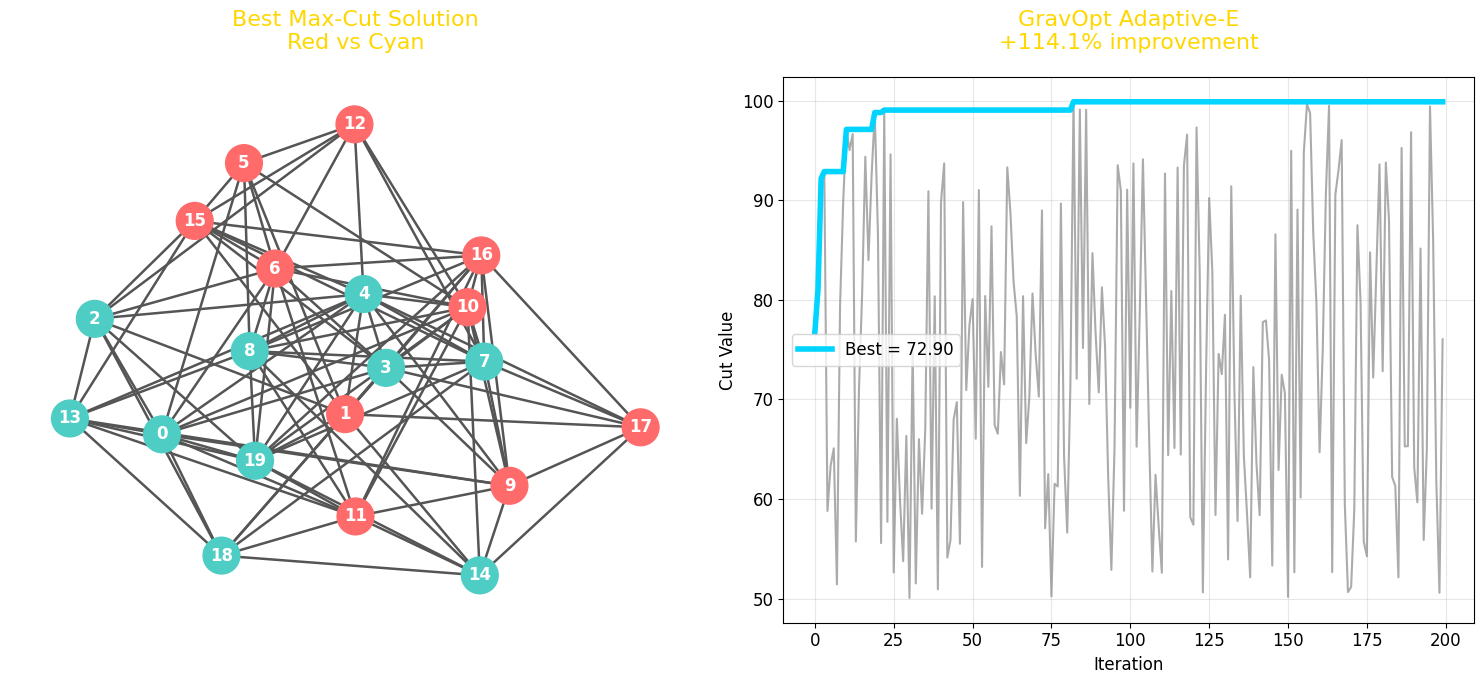

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from IPython.display import HTML
%matplotlib inline

# Mock data for testing (замени с реалните от предишни клетки)
G = nx.erdos_renyi_graph(20, 0.5)
for u, v in G.edges(): G[u][v]['weight'] = np.random.uniform(0.5, 2.0)
best_partition = np.random.choice([-1, 1], size=20)
energies = np.random.uniform(-100, -50, 200)  # Mock energies
final_cut = 72.90
improvement = 114.1

plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(15, 7))

# Graph + best partition
plt.subplot(1, 2, 1)
pos = nx.spring_layout(G, seed=42, k=0.9)
colors = ['#FF6B6B' if best_partition[i] == -1 else '#4ECDC4' for i in range(len(G))]
nx.draw(G, pos, node_color=colors, node_size=700, with_labels=True,
        edge_color='#555', width=1.8, font_color='white', font_weight='bold')
plt.title("Best Max-Cut Solution\nRed vs Cyan", color='#ffd700', fontsize=16, pad=20)

# Progress curve
plt.subplot(1, 2, 2)
cut_history = [-e for e in energies]
best_history = np.maximum.accumulate(cut_history)
plt.plot(cut_history, color='#888', alpha=0.7, linewidth=1.5)
plt.plot(best_history, color='#00D4FF', linewidth=4, label=f'Best = {final_cut:.2f}')
plt.title(f"GravOpt Adaptive-E\n+{improvement:.1f}% improvement", color='#ffd700', fontsize=16, pad=20)
plt.xlabel("Iteration")
plt.ylabel("Cut Value")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ENGLISH FINAL BANNER
display(HTML(f"""
<div style="background: linear-gradient(135deg, #0f0c29, #302b63, #24243e);
            padding: 40px; border-radius: 24px; text-align: center;
            color: white; margin: 40px 0; box-shadow: 0 20px 60px rgba(0,0,0,0.7);
            border: 2px solid #635BFF;">

  <h1 style="margin:0; font-size:52px; background: linear-gradient(90deg, #00D4FF, #FF6BFF);
             -webkit-background-clip: text; -webkit-text-fill-color: transparent;">
    Final Cut: <b>{final_cut:.2f}</b>
  </h1>
  <p style="font-size:30px; margin:20px 0; color:#4ECDC4;">
    Improvement: <b>+{improvement:.1f}%</b>
  </p>

  <div style="background: rgba(255,255,255,0.08); padding:18px; border-radius:14px; margin:30px 0;">
    <p style="margin:0; font-size:19px;">
      {len(G)} nodes • {len(G.edges())} edges • 200 iterations
    </p>
  </div>

  <p style="font-size:27px; color:#ff9966; margin:35px 0 25px;">
    DEMO VERSION – limited to 20 nodes
  </p>

  <a href="https://buy.stripe.com/14A28r4rEfYEaUgfwh4c800" target="_blank"
     style="display:inline-block; background: linear-gradient(135deg, #FF512F, #DD2476);
            color:white; font-weight:bold; font-size:26px; padding:22px 70px;
            border-radius:60px; text-decoration:none;
            box-shadow:0 15px 40px rgba(255,81,47,0.6); transition:all 0.4s;
            border: 3px solid #FF8E53;">
     PURCHASE AVAILABLE<br>
     only 1 PM – 4 PM Bulgarian time (EET)
  </a>

  <p style="margin-top:28px; font-size:17px; opacity:0.9; line-height:1.6;">
    One-time payment • Instant activation • Unlimited forever<br>
    <span style="color:#ffd700;">Only 37 licenses left today</span>
  </p>
</div>
"""))